## Basic preparation

In [158]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [159]:
# Load the data file

dftrain = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")

In [160]:
# Glimpse od the data

dftrain.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [161]:
# Basic analysis

dftrain.describe()


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [162]:
#How much missing data do we have

dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA





(0, 80)

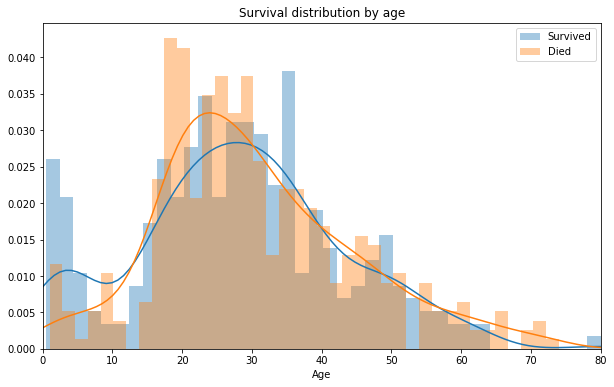

In [163]:
# Age analysis

Survived = dftrain[dftrain["Survived"] == 1]["Age"].dropna()
Died = dftrain[dftrain["Survived"] == 0]["Age"].dropna()


plt.figure(figsize = (10,6))
sns.distplot(Survived, bins = 40, label = "Survived")
sns.distplot(Died, bins = 40, label = "Died")
plt.title("Survival distribution by age")
plt.legend(loc = "upper right")
plt.xlim(0,80)

Text(0.5, 1.0, 'Survival by sex')

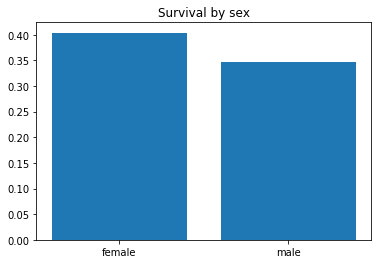

In [164]:
# Gender analysis

gender = dftrain.groupby("Sex")["Survived"].sum().reset_index()
cgender = dftrain["Sex"].value_counts(sort = False)
gender = gender.assign(total = cgender.values)
perct = gender.Survived / gender.total
gender = gender.assign(perct = perct.values)
gender

x_array = np.array(gender.Sex)
y_array = np.array(gender.perct)

plt.bar(x_array,y_array)
plt.title("Survival by sex")

Text(0.5, 1.0, 'Survival by Classticket')

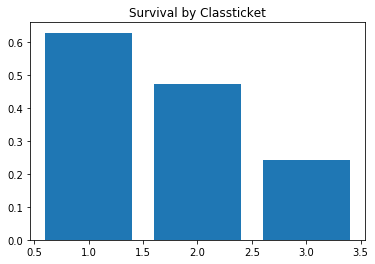

In [165]:
# Class analysis

classt = dftrain.groupby("Pclass")["Survived"].sum().reset_index()
cclasst = dftrain["Pclass"].value_counts(sort = False)
classt = classt.assign(total = cclasst.values)
perct3 = classt.Survived / classt.total
classt = classt.assign(perct = perct3.values)

x_array = np.array(classt.Pclass)
y_array = np.array(classt.perct)

plt.bar(x_array,y_array)
plt.title("Survival by Classticket")

Text(0.5, 1.0, 'Survival by embarking location')

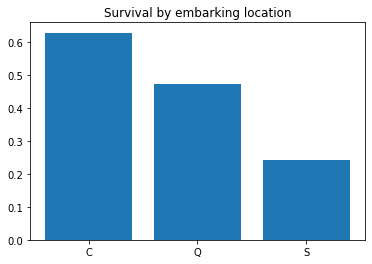

In [166]:
# Embark location class

embark = dftrain.groupby("Embarked")["Survived"].sum().reset_index()
cembark = dftrain["Embarked"].value_counts(sort = False)
embark = embark.assign(total = cembark.values)
perct4 = embark.Survived / embark.total
embark = embark.assign(perct = perct4.values)
embark

x_array = np.array(embark.Embarked)
y_array = np.array(classt.perct)

plt.bar(x_array,y_array)
plt.title("Survival by embarking location")


Text(0.5, 1, 'Survival vs number of relatives')

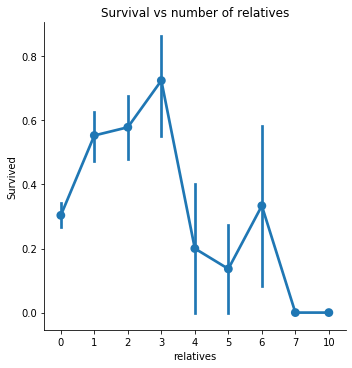

In [167]:
#Family and friends influence

dftrain["relatives"] = dftrain["SibSp"] + dftrain["Parch"]

sns.factorplot(x = "relatives", y = "Survived", data = dftrain)
plt.title("Survival vs number of relatives")

    

## Feature Engineering

Text(0.5, 1.0, 'Survival by age group')

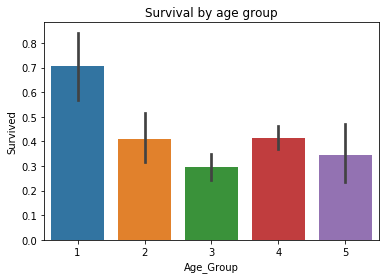

In [168]:
# Preparing age

##Filling missing data

data = [dftrain,dftest]

for i in data:
    i.loc[(i["Pclass"] == 1),"Age"] = i["Age"].fillna(37)
    i.loc[(i["Pclass"] == 2),"Age"] = i["Age"].fillna(30)
    i.loc[(i["Pclass"] == 3),"Age"] = i["Age"].fillna(25)

## Creating Age Groups

for i in data:
    cat = pd.cut(i.Age, bins = [0,5,18,25,50,81], labels = ["1","2","3","4","5"])
    i.insert(5,"Age_Group",cat)
    dic = {"1" : 1,"2": 2,"3" : 3,"4" : 4, "5" : 5}
    i["Age_Group"].replace(dic, inplace = True)
    
    
sns.barplot(x = "Age_Group", y = "Survived", data = dftrain)
plt.title("Survival by age group")


Text(0.5, 1.0, 'Survival and Title')

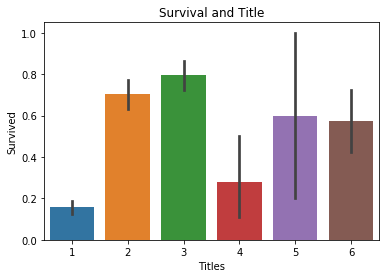

In [169]:
# Using the name title

key = {"Mr" : 1, 
       "Miss" : 2, 
       "Mrs" : 3, 
       "Capt": 4,
       "Col": 4,
       "Major": 4,
       "Dr": 4,
       "Rev": 4,
       "Jonkheer": 5,
       "Don": 5,
       "Dona": 5,
       "Sir" : 5,
       "Countess": 5,
       "Lady" : 5,
       "Mlle": 2,
       "Mme": 3,
       "Master" : 6,
       "Ms" : 2
       }
titles = []
for i in data:
    i.insert(6,"Titles", i["Name"].str.split(" ([A-Za-z]+)\.", n = 1, expand = True)[1])
    i.Titles.replace(key, inplace = True)

sns.barplot(x = "Titles", y = "Survived", data = dftrain)
plt.title("Survival and Title")

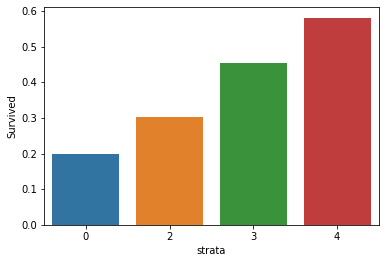

In [170]:
# How about the ticket fare?

fare = dftrain.groupby("Survived")["Fare"].median().reset_index()

for i in data:
    classfare = pd.qcut(i["Fare"], 4, labels = ["Poor","Medium_low","Medium_high","Rich"])
    i.insert(6,"strata", classfare)
    chave = {"Poor" : 0, "Medium_low" : 2, "Medium_high" : 3, "Rich" : 4}
    i["strata"].replace(chave, inplace = True)
    i["strata"].fillna(0, inplace = True)
    
faredata = dftrain.groupby("strata")["Survived"].mean().reset_index()
sns.barplot(x = "strata", y = "Survived", data = faredata)

In [171]:
# Preparing Gender

for i in data:
    i["Sex"].replace({"male" : 0, "female" : 1}, inplace = True)

In [172]:
# Preparing Embark location

## Filling the missing data

for i in data:
    i["Embarked"].fillna("S", inplace = True)
    
## Converting data

for i in data:
    chv = {"S" : 1, "C" : 2, "Q" : 3}
    i["Embarked"].replace(chv, inplace = True)
   

In [173]:
# Preparing relatives

dftest["relatives"] = dftest["SibSp"] + dftest["Parch"]

for i in data:
    i.loc[i["relatives"] > 0,"relatives"] = 1
 



In [174]:
# last changes

for i in data:
    i.drop(["Name"], axis =1, inplace = True)
    i.drop(["Age"], axis =1, inplace = True)
    i.drop(["Ticket"], axis =1, inplace = True)
    i.drop(["Fare"], axis = 1, inplace = True)
    i.drop(["Cabin"], axis = 1, inplace = True)
    i.Embarked.astype(int)
 


In [175]:
# Are we ready?

dftrain.head()


PassengerId  Survived  Pclass  Sex  Age_Group  strata  Titles  SibSp  \
0            1         0       3    0          3       0       1      1   
1            2         1       1    1          4       4       3      1   
2            3         1       3    1          4       2       2      0   
3            4         1       1    1          4       4       3      1   
4            5         0       3    0          4       2       1      0   

   Parch  Embarked  relatives  
0      0         1          1  
1      0         2          1  
2      0         1          0  
3      0         1          1  
4      0         1          0

## Creating ML Model

In [176]:
# Importing packages

from sklearn.ensemble import RandomForestClassifier


In [208]:
# Executing the model

X_train = dftrain.drop(["Survived"], axis = 1)
X_train.drop(["PassengerId"], axis = 1, inplace = True)
y_train = dftrain["Survived"]
X_test = dftest.drop(["PassengerId"], axis = 1)

random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 1, max_features = "auto")
random_forest.fit(X_train,y_train)

y_prediction = random_forest.predict(X_test)
random_forest.score(X_train,y_train)

0.9023569023569024

In [201]:
# Export file for evaluation at kaggle

my_submission = pd.DataFrame({"PassengerId":dftest["PassengerId"],"Survived":y_prediction})
my_submission.to_csv("my_submission.csv", index = False)

In [196]:
my_submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

## Model Evaluation

In [209]:
# K folds

from sklearn.model_selection import cross_val_score

kfold = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")

foldt = pd.DataFrame({"scores" : kfold})
print(foldt)
print("stdev", foldt.std())

     scores
0  0.788889
1  0.866667
2  0.741573
3  0.831461
4  0.898876
5  0.865169
6  0.808989
7  0.752809
8  0.853933
9  0.829545
stdev scores    0.051017
dtype: float64


In [210]:
# Features importance

pd.DataFrame({"features":X_train.columns, "Relative Importance":random_forest.feature_importances_})


features  Relative Importance
0     Pclass             0.132049
1        Sex             0.177621
2  Age_Group             0.119050
3     strata             0.101958
4     Titles             0.267642
5      SibSp             0.078904
6      Parch             0.048234
7   Embarked             0.054993
8  relatives             0.019550

In [212]:
# OOB

print(random_forest.oob_score_)

0.813692480359147


## Hyperparameter Tuning

In [202]:
# What is the parameters of this model?

random_forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)>

In [213]:
# Creating a CVseachgrid

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['sqrt', 'auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8 , 10]
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['sqrt', 'auto', 'log2'], 'max_depth': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'bootstrap': [True]}


In [215]:
# Iterating with the grid

rf_test = RandomForestClassifier()

random_forest_rand = RandomizedSearchCV(estimator = rf_test, param_distributions = random_grid, cv = 10, n_iter = 100, n_jobs = -1, random_state = 1, verbose = 2)

random_forest_rand.fit(X_train,y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 251 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 993 out of 1000 | elapsed:  1.0min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.0min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [216]:
random_forest_rand.best_params_

{'n_estimators': 73,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 68,
 'bootstrap': True}

In [217]:
# 2nd tuning 

from sklearn.model_selection import GridSearchCV

n_estimators = [60,70,80]
max_features = ['sqrt']
max_depth = [50,50,60]
min_samples_split = [5,10,15,20]
min_samples_leaf = [2,3,4,5]
bootstrap = [True]
# Create the random grid
best_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(best_grid)

{'n_estimators': [60, 70, 80], 'max_features': ['sqrt'], 'max_depth': [50, 50, 60], 'min_samples_split': [5, 10, 15, 20], 'min_samples_leaf': [2, 3, 4, 5], 'bootstrap': [True]}


In [218]:
best_random_forest = GridSearchCV(estimator = rf_test, param_grid = best_grid, n_jobs = -1, cv = 10, verbose = 2)

In [219]:
best_random_forest.fit(X_train, y_train)
best_random_forest.best_params_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.0min finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 60}

## Creating final submission

In [220]:
# Running the model

rf = RandomForestClassifier(n_estimators = 50, max_features = "sqrt", max_depth = 50, min_samples_split = 10, min_samples_leaf = 2, bootstrap = True, oob_score = True, n_jobs = -1)
rf.fit(X_train,y_train)
final_result = rf.predict(X_test)
my_submissionfinal = pd.DataFrame({"PassengerId":dftest["PassengerId"],"Survived":final_result})
my_submissionfinal.to_csv("my_submission.csv", index = False)


In [221]:
#OOB score
print(rf.oob_score_)

0.8294051627384961


In [222]:
#ROC AUC

from sklearn.metrics import roc_auc_score
y_scores = rf.predict_proba(X_train)
y_scores = y_scores[:,1]
RAS = roc_auc_score(y_train,y_scores)
print(RAS)


0.9263599953131157


In [164]:
from sklearn.tree import export_graphviz
rf.fit(X_train,y_train)
export_graphviz(rf,
                feature_names=X_train.columns,
                filled=True,
                rounded=True)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [189]:
dftest.loc[dftest.strata.isna()]

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, Age_Group, strata, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [145]:
dftest.Titles.value_counts()

1       240
2        79
3        72
6        21
4         5
Dona      1
Name: Titles, dtype: int64